In [1]:
import os
import json
import numpy as np
import torch
import result
import pandas as pd
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, rmse_np, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import *
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# pred 3 time step

## Best Jar

In [28]:
best_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_jar_3'))
jar_result = result.Printer(best_jar_folder)
jar_result.process_config(nt_test=4, validation_length=3)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['rmse_test_loss', 'sum_test_loss'], increase=False).sort_values('rmse_test_loss')
# jar_df = jar_result.get_df(col=['nhid', 'nlayers', 'lambd', 'dropout_d', 'dropout_f', 'l1_rel', 'l2_z', 'wd', 'wd_z'], increase=False)
jar_df

classical-stnn_09-13-16-59-27_2235
0
Load classical model.
0
(846.1173338531166, 1121.2848094817132, 15194.138590698532, 17414.871384464248)
v1-stnn_05-11-00-08-18_2934
0
Load v1 model.
0
0
(576.6144188522331, 757.9096149982464, 10508.078585005602, 11819.685767992292)
keras-rnn_05-12-11-00-42_1851
0
Load keras model.
0
0
(100000000.0, 100000000.0, 6983.143994659669, 10281.91664584504)
v3-stnn_05-11-00-03-30_4097
0
Load v3 model.
0
0
(211.58526894546324, 479.1901754150468, 3812.5858954639007, 7479.598966962682)
keras-rnn_05-12-11-00-42_5547
0
Load keras model.
0
0
(100000000.0, 100000000.0, 574.920351292273, 934.6824498998285)
ori-stnn_05-11-00-03-30_8934
0
Load ori model.
0
(185.2800817310169, 501.8801516472332, 3540.9910110955766, 7822.575978519078)
v4-stnn_09-16-14-16-15_4994
0
Load v4 model.
0
0
(140.96808017197475, 218.90349597315634, 2498.441296900412, 2539.8784741342192)
ori-stnn_05-11-00-08-18_1987
0
Load ori model.
0
(687.3114322129117, 1789.946053781817, 1748.5477983276094, 10

,rmse_test_loss,sum_test_loss
v4-stnn_09-16-14-16-15_4994,218.903,2539.88
v3-stnn_05-11-00-03-30_4097,479.19,7479.6
ori-stnn_05-11-00-03-30_8934,501.88,7822.58
v1-stnn_05-11-00-08-18_2934,757.91,11819.7
classical-stnn_09-13-16-59-27_2235,1121.28,17414.9
ori-stnn_05-11-00-08-18_1987,1789.95,10329.3
v3-stnn_05-11-00-08-18_4608,3188.6,29866.4
keras-rnn_05-12-11-00-42_1851,1e+08,10281.9
keras-rnn_05-12-11-00-42_5547,1e+08,934.682


0
0
0
0
0


({'STNN': array([  814.        ,  1282.        ,  1895.        ,  2608.        ,
          4329.        ,  5646.        ,  7309.        ,  9346.        ,
         11346.        , 13711.        , 16399.        , 19320.        ,
          -284.94126892,  -308.45362854,  -204.71566772,  -227.59065247,
          -351.46098328,  -123.5282135 ,  -184.12452698]),
  'STNN-A': array([  814.        ,  1282.        ,  1895.        ,  2608.        ,
          4329.        ,  5646.        ,  7309.        ,  9346.        ,
         11346.        , 13711.        , 16399.        , 19320.        ,
         20840.24090934, 19252.84447169, 19683.5060153 , 19398.7136718 ,
         19632.93926191, 20129.8368125 , 19063.44791555]),
  'STNN-I': array([  814.        ,  1282.        ,  1895.        ,  2608.        ,
          4329.        ,  5646.        ,  7309.        ,  9346.        ,
         11346.        , 13711.        , 16399.        , 19320.        ,
         19400.1727829 , 22981.38635254, 22909.0243

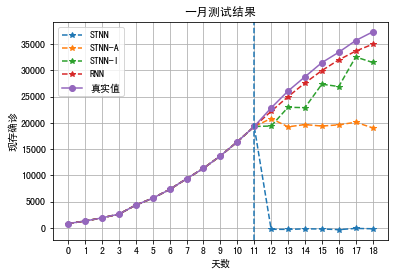

In [15]:
jar_3_dir = {"STNN": "classical-stnn_09-13-16-59-27_2235", "STNN-A": "ori-stnn_05-11-00-03-30_8934", "STNN-I": "v4-stnn_09-16-14-16-15_4994", "RNN": "keras-rnn_05-12-11-00-42_5547" }
folder = "../output_result/best_jar_3"
result.plot_generate(jar_3_dir, folder, line_time=12, title='一月测试结果')

0
Load classical model.
0
Load v4 model.
0
0
Load ori model.
0
jar
19060.510845809815
2505.886454245085
3977.0663185560547


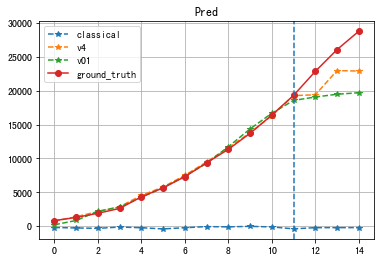

<Figure size 432x288 with 0 Axes>

In [9]:
jar_3_dir = {"classical": "classical-stnn_09-13-16-59-27_2235", "v4": "v4-stnn_09-16-14-16-15_4994", "v01": "ori-stnn_05-11-00-03-30_8934"}
folder = "../output_result/best_jar_3"
result.plot_pred_by_dir(jar_3_dir, folder, line_time=3, train=True)
plt.savefig(fname='jar.pdf')

In [130]:
best_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_jar'))
jar_result = result.Printer(best_jar_folder)
pd.options.display.max_rows = None
# jar_result.process_config(nt_test=4, validation_length=7)
# a = jar_result.get_df(cbol=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
# jar_df = jar_result.get_df(col=['rmse_test_loss', 'sum_test_loss', 'rmse_val_loss', 'minrmse', 'final_rmse_score', 'sum_val_loss'], increase=False).sort_values('rmse_test_loss')
jar_df = jar_result.get_df(col=['nhid', 'nlayers', 'lambd', 'dropout_d', 'dropout_f', 'l1_rel', 'l2_z', 'wd', 'wd_z'], increase=False)
jar_df

,nhid,nlayers,lambd,dropout_d,dropout_f,l1_rel,l2_z,wd,wd_z
classical-stnn_09-15-20-33-56_8606,0,1,1,0.5,0.5,0,0,1e-06,1e-07
v3-stnn_05-05-21-48-09_8374,0,1,20,0.5,0.5,0,0,1e-06,1e-07
keras-rnn_05-12-15-42-38_5547,100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v4-stnn_09-15-19-45-07_0975,0,1,0.1,0.5,0.5,0,0,1e-06,1e-07
keras-rnn_05-12-15-42-38_1851,100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ori-stnn_05-05-21-59-14_1726,0,1,10,0.5,0.5,0,0,1e-06,1e-07


In [12]:
jar_7_dir = {"STNN-C": "classical-stnn_09-15-20-33-56_8606", "STNN-I": "ori-stnn_05-05-21-59-14_1726", "STNN-A": "v4-stnn_09-15-19-45-07_0975", "RNN": "keras-rnn_05-12-15-42-38_5547", }
folder = "../output_result/best_jar"
result.plot_generate(jar_7_dir, folder, line_time=7)

0
0
0
0


KeyError: 'validation_length'

## Best Feb

In [30]:
best_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_feb_3'))
feb_result = result.Printer(best_feb_folder)
pd.options.display.max_rows = None
feb_result.process_config(nt_test=4, validation_length=3)
feb_df = feb_result.get_df(col=['rmse_test_loss', 'sum_test_loss'], increase=False).sort_values('rmse_test_loss')
# feb_df = feb_result.get_df(col=['minrmse', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'nt_train', 'validation_length'], increase=False).sort_values('final_rmse_score')
feb_df

v4-stnn_09-16-14-52-05_7205
0
Load v4 model.
0
0
(23.396154916414652, 33.99990057176159, 204.24205205512303, 439.259548447954)
ori-stnn_05-12-16-06-12_0454
0
Load ori model.
0
(657.5262451171875, 671.7804245487337, 9170.754580806755, 7506.823958933236)
classical-stnn_09-17-01-45-09_9062
0
Load classical model.
0
(1099.852298203335, 957.1345775973413, 6093.227952354896, 2536.9855673540596)
v1-stnn_05-12-16-06-13_8446
0
Load v1 model.
0
0
(356.62408930095296, 616.6956416363678, 6748.677526779636, 9883.011691934491)
v3-stnn_05-12-16-58-50_8071
0
Load v3 model.
0
0
(1218.3798611548639, 1234.1516910676032, 2680.493609035771, 6099.09782518344)
v1-stnn_05-11-00-03-30_1801
0
Load v1 model.
0
0
(1125.7693908035114, 952.4125833818989, 1986.1259757746775, 2536.047539513763)
v3-stnn_05-11-00-08-18_8059
0
Load v3 model.
0
0
(1629.0162287886424, 1850.8149039976058, 6006.273225074347, 5004.80434828166)
ori-stnn_09-16-17-45-42_1855
0
Load ori model.
0
(400.25425605363745, 607.1002408919796, 7085.43924

,rmse_test_loss,sum_test_loss
v4-stnn_09-16-14-52-05_7205,33.9999,439.26
ori-stnn_09-16-17-45-42_1855,607.1,6098.47
v1-stnn_05-12-16-06-13_8446,616.696,9883.01
ori-stnn_05-12-16-06-12_0454,671.78,7506.82
v1-stnn_05-11-00-03-30_1801,952.413,2536.05
classical-stnn_09-17-01-45-09_9062,957.135,2536.99
v3-stnn_05-12-16-58-50_8071,1234.15,6099.1
ori-stnn_05-11-00-03-30_9789,1438.09,2805.12
v3-stnn_05-11-00-08-18_8059,1850.81,5004.8
keras-rnn_05-12-15-30-37_4449,1e+08,524.01


0
0
0
0
0


({'STNN': array([22859.        , 26079.        , 28793.        , 31492.        ,
         33478.        , 35703.        , 37347.        , 38473.        ,
         52246.        , 55422.        , 56466.        , 57107.        ,
         57478.        , 57544.        , 57254.        , 55753.        ,
         54557.        , 52885.        , 51330.        , 49580.        ,
         47373.        , 45307.        , 42874.        , 39768.        ,
         37155.        , 34847.        , 32327.        , 30007.        ,
         27349.        , 14826.02026367, 14412.89678955, 12757.92797852,
         13043.26269531, 12655.31506348, 12966.19348145, 13894.27813721]),
  'STNN-I': array([22859.        , 26079.        , 28793.        , 31492.        ,
         33478.        , 35703.        , 37347.        , 38473.        ,
         52246.        , 55422.        , 56466.        , 57107.        ,
         57478.        , 57544.        , 57254.        , 55753.        ,
         54557.        , 52885.

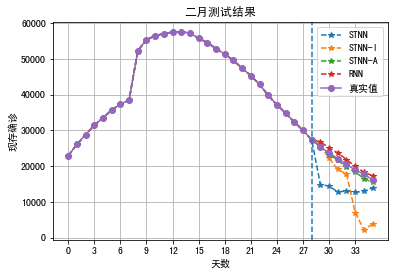

In [17]:
feb_3_dir = {'STNN':'classical-stnn_09-17-01-45-09_9062', "STNN-I": "ori-stnn_05-12-16-06-12_0454", "STNN-A": "v4-stnn_09-16-14-52-05_7205", "RNN": "keras-rnn_05-12-15-30-37_4449", }
folder = "../output_result/best_feb_3"
result.plot_generate(feb_3_dir, folder, line_time=29, title='二月测试结果')

In [80]:
best_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_feb'))
feb_result = result.Printer(best_feb_folder)
pd.options.display.max_rows = None
# feb_result.process_config(nt_test=4, validation_length=7)
feb_df = feb_result.get_df(col=['rmse_test_loss', 'sum_test_loss', 'rmse_val_loss', 'minrmse', 'sum_val_loss', 'nlayers', 'nhid', 'nt_train', 'validation_length'], increase=False).sort_values('rmse_test_loss')
# feb_df = feb_result.get_df(col=['test_loss', 'minrmse', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'nt_train', 'validation_length'], increase=False).sort_values('final_rmse_score')
feb_df

,rmse_test_loss,sum_test_loss,rmse_val_loss,minrmse,sum_val_loss,nlayers,nhid,nt_train,validation_length
classical-stnn_09-15-20-33-56_1578,672.274,8642.6,956.019,892.207,10384.7,3,100,29,7
ori-stnn_05-05-15-37-32_9694,1214.34,2529.28,1249.55,NaN,654.975,1,0,29,7
v4-stnn_09-16-15-06-27_2602,2200.73,12983.7,1847.64,94.5472,7559,3,100,29,7
v3-stnn_05-05-20-51-18_3087,2425.32,37211.4,1606.14,NaN,17938.4,3,100,29,7


0
0
0
0


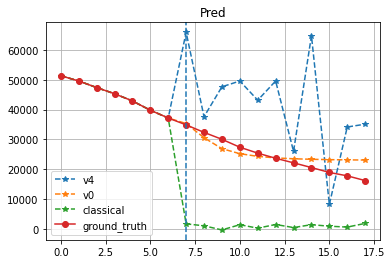

({'v4': array([51330.        , 49580.        , 47373.        , 45307.        ,
         42874.        , 39768.        , 37155.        , 65927.71282959,
         37581.43804932, 47628.62237549, 49559.10742188, 43127.38171387,
         49569.45227051, 25941.71582031, 64751.2208252 ,  8170.86047363,
         34136.99810791, 35078.84832764]),
  'v0': array([51330.        , 49580.        , 47373.        , 45307.        ,
         42874.        , 39768.        , 37155.        , 35282.81732178,
         30542.53295898, 26860.97790527, 25180.16802979, 24285.78582764,
         23761.37524414, 23476.03027344, 23300.12091064, 23184.60418701,
         23104.57159424, 23048.68707275]),
  'classical': array([51330.        , 49580.        , 47373.        , 45307.        ,
         42874.        , 39768.        , 37155.        ,  1643.9262085 ,
           985.06347656,  -397.22302246,  1350.47399902,   191.01391602,
          1419.90673828,   394.48864746,  1357.8404541 ,   846.77807617,
           55

In [120]:
feb_dir = {"v4": "v4-stnn_09-16-15-06-27_2602", "v0": "ori-stnn_05-05-15-37-32_9694", "classical": "classical-stnn_09-15-20-33-56_1578"}
folder = "../output_result/best_feb"
result.plot_generate(feb_dir, folder, line_time=7)

## Mar

In [32]:
best_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_mar_3'))
mar_result = result.Printer(best_mar_folder)
pd.options.display.max_rows = None
mar_result.process_config(nt_test=4, validation_length=3)
mar_df = mar_result.get_df(col=['rmse_test_loss', 'sum_test_loss'], increase=False).sort_values('rmse_test_loss')
# mar_df = mar_result.get_df(col=['minsum', 'final_sum_score', 'final_rmse_score', 'activation', 'min_rmse_epoch', 'nt_train'], increase=False).sort_values('minsum')
mar_df

v3-stnn_05-12-18-19-44_5871
0
Load v3 model.
0
0
(5.912924911386224, 17.27510759366616, 3.7938799234540643, 159.08037736991045)
keras-rnn_05-13-10-07-37_3329
0
Load keras model.
0
0
(100000000.0, 100000000.0, 162.33057201603606, 260.36381890879835)
v4-stnn_09-16-15-17-48_0415
0
Load v4 model.
0
0
(125.9859866890856, 174.32039470057333, 295.74019645471424, 430.89587929286415)
v4-stnn_09-17-02-04-19_0887
0
Load v4 model.
0
0
(78.52448198872227, 113.92294003886562, 352.8081379696532, 476.5467328200344)
classical-stnn_09-13-17-17-05_3375
0
Load classical model.
0
(115.84473082839801, 98.45024195025044, 574.6212256342452, 757.4592601919186)
v4-stnn_09-16-18-42-46_6437
0
Load v4 model.
0
0
(136.60989478326613, 199.12780946300876, 570.0908007374303, 1019.8820507235894)
v4-stnn_09-16-18-32-07_9225
0
Load v4 model.
0
0
(147.31086845808133, 162.3321730090726, 617.9567766561572, 168.45997977732807)
keras-rnn_05-13-09-46-48_9884
0
Load keras model.
0
0
(100000000.0, 100000000.0, 2369.9147219812503

/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:29: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


,rmse_test_loss,sum_test_loss
v3-stnn_05-12-18-19-44_5871,17.2751,159.08
ori-stnn_05-12-18-19-44_8331,18.7169,291.12
classical-stnn_09-13-17-17-05_3375,98.4502,757.459
v4-stnn_09-17-02-04-19_0887,113.923,476.547
v4-stnn_09-16-18-32-07_9225,162.332,168.46
v4-stnn_09-16-15-17-48_0415,174.32,430.896
v4-stnn_09-16-18-42-46_6437,199.128,1019.88
keras-rnn_05-13-10-07-37_3329,1e+08,260.364
keras-rnn_05-13-09-46-48_9884,1e+08,2818.02


0
0
0
0
0


({'STNN': array([30007.        , 27349.        , 25364.        , 23644.        ,
         22109.        , 20528.        , 18887.        , 17748.        ,
         16156.        , 14809.        , 14762.        , 12088.        ,
         10722.        ,  9837.        ,  8958.        ,  8052.        ,
          7256.        ,  6559.        ,  6010.        ,  5546.        ,
          5137.        ,  4740.        ,  4285.        ,  3953.        ,
          3459.        ,  3133.        ,  2690.        ,  2390.        ,
          2158.        ,  2109.06860352,  3092.1328125 ,  2927.85232544,
          3164.49713135,  2742.3535614 ,  2422.5381012 ,  2772.57273865]),
  'STNN-A': array([30007.        , 27349.        , 25364.        , 23644.        ,
         22109.        , 20528.        , 18887.        , 17748.        ,
         16156.        , 14809.        , 14762.        , 12088.        ,
         10722.        ,  9837.        ,  8958.        ,  8052.        ,
          7256.        ,  6559.

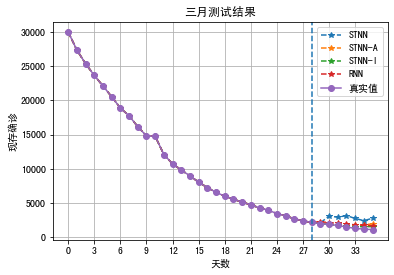

In [33]:
mar_3_dir = {"STNN": "classical-stnn_09-13-17-17-05_3375", "STNN-A": "ori-stnn_05-12-18-19-44_8331", "STNN-I": "v3-stnn_05-12-18-19-44_5871",   "RNN": "keras-rnn_05-13-10-07-37_3329"}
folder = "../output_result/best_mar_3"
result.plot_generate(mar_3_dir, folder, line_time=29, title='三月测试结果')

In [100]:
best_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'best_mar'))
mar_result = result.Printer(best_mar_folder)
pd.options.display.max_rows = None
mar_result.process_config(nt_test=4, validation_length=7)
mar_df = mar_result.get_df(col=['rmse_test_loss', 'sum_test_loss', 'rmse_val_loss', 'final_rmse_score', 'sum_val_loss', 'nlayers', 'nhid'], increase=False).sort_values('rmse_test_loss')
# mar_df = mar_result.get_df(col=['minsum', 'final_sum_score', 'final_rmse_score', 'activation', 'data_normalize', 'nt_train', 'increase'], increase=False).sort_values('minsum')
mar_df

ori-stnn_05-05-23-54-49_4373
0
Load ori model.
mar
0
(111.0467776812716, 87.68739884899509, 266.93319260776525, 414.45535580320086)
v3-stnn_05-06-00-05-54_5028
0
Load v3 model.
0
mar
0
(352.259036648658, 559.8106433499244, 1599.0603241818885, 4106.835720390838)
keras-rnn_05-12-15-30-37_6213
0
Load keras model.
0
mar_rnn
0
(100000000.0, 100000000.0, 3552.841362376232, 12243.825133233873)
classical-stnn_09-15-20-33-56_4263
0
Load classical model.
mar
0
(106.21572650962162, 75.2656747141192, 770.6028348645242, 450.0466522552249)
keras-rnn_05-12-15-30-37_9254
0
Load keras model.
0
mar_rnn
0
(100000000.0, 100000000.0, 23.943738021214784, 118.20737695200633)
v4-stnn_09-16-15-17-48_6461
0
Load v4 model.
0
mar
0
(175.8572507937383, 201.55651240195, 499.2795782145457, 392.1958623252148)


,rmse_test_loss,sum_test_loss,rmse_val_loss,final_rmse_score,sum_val_loss,nlayers,nhid
classical-stnn_09-15-20-33-56_4263,75.2657,450.047,106.216,72.152,770.603,2,100
ori-stnn_05-05-23-54-49_4373,87.6874,414.455,111.047,None,266.933,1,0
v4-stnn_09-16-15-17-48_6461,201.557,392.196,175.857,20.5967,499.28,2,100
v3-stnn_05-06-00-05-54_5028,559.811,4106.84,352.259,None,1599.06,3,100
keras-rnn_05-12-15-30-37_6213,1e+08,12243.8,1e+08,8425.91,3552.84,2,100
keras-rnn_05-12-15-30-37_9254,1e+08,118.207,1e+08,52.555,23.9437,1,100


0
0
0
0
0


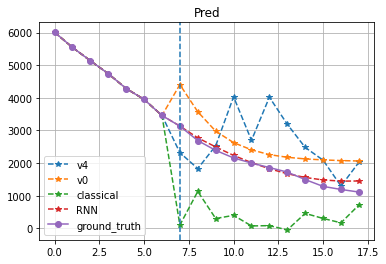

({'v4': array([6010.        , 5546.        , 5137.        , 4740.        ,
         4285.        , 3953.        , 3459.        , 2319.99621582,
         1831.69299316, 2529.22035217, 4032.1844635 , 2696.4334259 ,
         4019.75367737, 3190.25169373, 2480.46530151, 2089.26974487,
         1297.0227356 , 2025.05401611]),
  'v0': array([6010.        , 5546.        , 5137.        , 4740.        ,
         4285.        , 3953.        , 3459.        , 4405.01751709,
         3572.91885376, 2978.63430786, 2627.0798645 , 2406.32788086,
         2259.16104126, 2177.96063232, 2128.15289307, 2097.23190308,
         2077.06079102, 2063.87176514]),
  'classical': array([6010.        , 5546.        , 5137.        , 4740.        ,
         4285.        , 3953.        , 3459.        ,  101.58285522,
         1131.13031006,  301.60098267,  398.16104126,   74.2315979 ,
           83.23080444,  -47.887146  ,  458.51812744,  303.60903931,
          169.81451416,  716.49783325]),
  'RNN': array([6010.   

In [123]:
mar_7_dir = {"v4": "v4-stnn_09-16-15-17-48_6461", "v0": "ori-stnn_05-05-23-54-49_4373", "classical": "classical-stnn_09-15-20-33-56_4263", "RNN": "keras-rnn_05-12-15-30-37_9254"}
folder = "../output_result/best_mar"
result.plot_generate(mar_7_dir, folder, line_time=7)

## Jar

In [31]:
datadir = 'data'
dataset = 'jar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()
jar_rmse = {'v0': 'ori-stnn_05-10-17-40-20_9687', 'v1': 'v1-stnn_05-10-15-34-49_8058', 'v3': 'v3-stnn_05-10-17-40-29_1975'}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'jar_3'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'activation', 'time_datas', 'data_normalize', 'used_model'], increase=False).sort_values('minrmse')
jar_df.loc[jar_df['used_model']== 'v1']

,sum_loss,minsum,minrmse,activation,time_datas,data_normalize,used_model
v1-stnn_05-10-15-34-49_8058,5167.42,8074.9,442.635,tanh,all,d,v1
v1-stnn_05-10-15-34-49_8289,173.659,8243.01,455.003,sigmoid,all,d,v1
v1-stnn_05-10-17-40-23_0267,9737.98,8359.59,460.743,tanh,[confirmed],d,v1
v1-stnn_05-10-17-40-23_3861,14271.2,8489.4,467.777,sigmoid,[confirmed],x,v1
v1-stnn_05-10-15-34-49_0298,116.179,9061.78,500.746,sigmoid,all,x,v1
v1-stnn_05-10-15-34-48_1034,2388.39,9142.61,510.417,tanh,all,x,v1
v1-stnn_05-10-15-34-48_7788,221.293,9403.46,519.38,tanh,all,x,v1
v1-stnn_05-10-15-34-49_1856,3410.67,9355.67,519.823,tanh,all,d,v1
v1-stnn_05-10-17-40-22_9441,10237.4,9434.18,521.273,sigmoid,[confirmed],x,v1
v1-stnn_05-10-17-40-22_3655,13254.9,9453.35,522.927,tanh,[confirmed],d,v1


In [32]:
jar_rmse = {'v0': 'ori-stnn_05-10-17-40-20_9687', 'v1': 'v1-stnn_05-10-17-40-23_0267', 'v3': 'v3-stnn_05-10-17-40-29_1975'}
result.output_scr_by_dir(jar_rmse, jar_folder)

1518
218
2738.5558811822116
14271.205807091073
3355.9202446704585


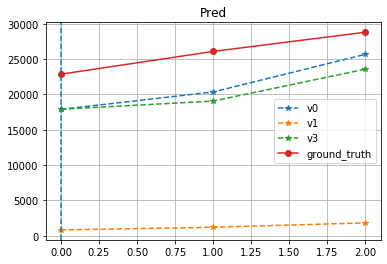

({'v0': array([17880.15332031, 20340.29001617, 25666.42227173]),
  'v1': array([ 817.57034269, 1194.88760614, 1812.22599837]),
  'v3': array([17896.95885468, 19046.58638   , 23569.67610168])},
 array([22859., 26079., 28793.]))

In [5]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'ori-stnn_05-10-17-40-20_1897'
# exp_dir = {'test': exp_name}
jar_min_sum = {'v0': 'ori-stnn_05-10-17-40-20_1897', 'v1': 'v1-stnn_05-10-17-40-23_3861', 'v3': 'v3-stnn_05-10-17-40-28_5828'}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
print(exp.config['min_sum_epoch'])
print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(jar_min_sum, path, train=False, increase=False)

In [8]:
exp.draw_loss()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3\\ori-stnn_05-10-17-40-20_1897\\logs.json'

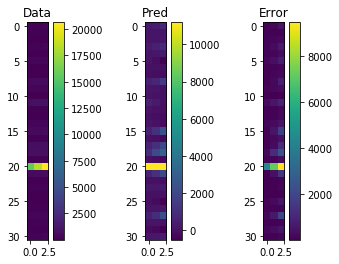

In [9]:
exp.plot_distribution()

## Feb

In [75]:
feb_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
feb_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'feb_3'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = 20
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'time_datas', 'manualSeed'], increase=False).sort_values('minrmse')
# feb_df = feb_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

feb_df



,sum_loss,minsum,minrmse,nhid,nlayers,nz,lambd,time_datas,manualSeed
ori-stnn_05-10-17-38-30_5447,742.393,160.214,30.5417,100,2,10,0.1,[confirmed],9930
ori-stnn_05-10-17-38-30_5058,3649.19,472.504,70.0058,100,4,10,10,[confirmed],8304
ori-stnn_05-10-17-38-29_3044,9341.17,355.751,71.1426,100,2,10,10,[confirmed],4537
v3-stnn_05-10-17-38-33_0251,11383.6,250.282,72.3394,100,2,10,0.1,[confirmed],299
ori-stnn_05-10-17-38-30_9768,4026.65,767.619,80.8259,100,4,10,0.1,[confirmed],9303
...,...,...,...,...,...,...,...,...,...
ori-stnn_05-10-15-44-41_6135,8031.54,19465.5,2168.79,100,4,10,10,all,6354
v3-stnn_05-10-15-44-51_0820,7571.04,14655.6,2325.09,10,4,10,10,all,2683
ori-stnn_05-10-15-44-41_1827,4184.09,21955.1,2361.47,10,2,10,10,all,9235
ori-stnn_05-10-15-44-41_3910,9236.79,20471.8,2386.8,10,4,10,10,all,5893


In [74]:
result.output_scr_by_dir(feb_rmse, feb_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(feb_min_sum, feb_folder, minepoch='sum', write='a')

9995
281.5994371670056
281.5994371670056


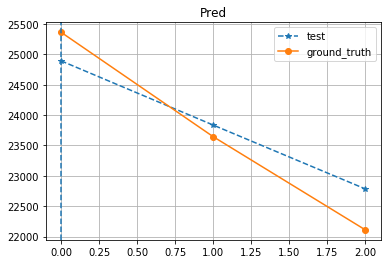

({'test': array([24893.02453613, 23835.34179688, 22783.72558594])},
 array([25364., 23644., 22109.]))

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output_result/feb'
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)

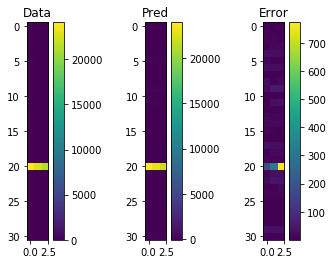

In [21]:
exp.plot_distribution()

## Mar

In [71]:
mar_rmse = {'v0': 'ori-stnn_05-10-17-38-30_9768', 'v1': 'v1-stnn_05-10-17-38-28_9093', 'v3': 'v3-stnn_05-10-17-38-33_0251'}
mar_sum = {'v0': 'ori-stnn_05-10-17-38-30_7738', 'v1': 'v1-stnn_05-10-17-38-28_6094', 'v3': 'v3-stnn_05-10-17-38-33_5930'}

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = 20
# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'nhid', 'nlayers', 'nz', 'lambd', 'min_rmse_epoch'], increase=False).sort_values('minrmse')
# mar_df = mar_result.get_df(col=['nlayers', 'nhid', 'nz', 'lambd', 'time_datas', 'activation'], increase=False)

mar_df

,sum_loss,minsum,minrmse,nhid,nlayers,nz,lambd,min_rmse_epoch
v3-stnn_05-11-00-11-02_5512,311.452,21.7597,2.51197,0,1,20,30,1587
v3-stnn_05-11-00-11-02_1755,2377.04,9.41803,2.65069,0,1,40,20,2918
v3-stnn_05-11-00-11-02_0252,935.994,6.60832,2.68927,0,1,40,10,149
v3-stnn_05-11-00-11-02_0905,1310.9,26.3375,2.91386,0,1,20,30,2423
v3-stnn_05-11-00-11-02_3516,1351.92,4.50065,3.05517,0,1,20,30,1514
...,...,...,...,...,...,...,...,...
ori-stnn_05-10-17-41-37_6615,36462.4,8852.44,3495.8,10,4,10,10,12
v3-stnn_05-10-15-41-21_1235,36472.4,6590.86,3544.9,10,4,10,0.1,118
v3-stnn_05-10-15-41-21_7010,36396.9,8195.44,3585.54,10,4,10,10,597
ori-stnn_05-10-17-41-37_2632,36362.9,9176.74,3608.9,10,4,10,0.1,1984


# RNN

In [7]:
mar_rnn = {'keras1': 'keras-rnn_05-09-16-50-18_9254', 'keras2': 'keras-rnn_05-09-16-50-18_6213'}
feb_rnn = {'keras1': 'keras-rnn_05-10-15-45-12_0911', 'keras2': 'keras-rnn_05-10-15-45-12_4449'}
jar_rnn = {'keras1': 'keras-rnn_05-09-16-47-47_5547', 'keras2': 'keras-rnn_05-09-16-47-47_1851'}

result.output_scr_by_dir(mar_rnn, rnn_mar_folder, configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(feb_rnn, rnn_feb_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')
result.output_scr_by_dir(jar_rnn, rnn_jar_folder, write='a', configs=['rnn_model', 'activation', 'batch_size', 'dataset', 'increase', 'lr', 'manualSeed', 'nhid', 'nlayers', 'nt_train', 'start_time'], minepoch='rmse')



In [6]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))


In [ ]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
minsum = {'v0': 'ori-stnn_05-11-00-17-30_7377', 'v3': 'v3-stnn_05-11-00-17-30_0015', 'v1': 'v1-stnn_05-11-00-17-30_7250'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'data_normalize', 'time_datas', 'activation'], increase=False).sort_values('minsum')
mar_df

In [115]:
datadir = 'data'
dataset = 'mar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'mar_3'))
mar_result = result.Printer(mar_folder)
pd.options.display.max_rows = None
mar_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
mar_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
mar_df = mar_result.get_df(col=['nt_train', 'nhid', 'minsum', 'minrmse', 'data_normalize', 'nlayers', 'activation'], increase=False).sort_values('minsum')
mar_df.loc[mar_df['nt_train'] == 31]

,nt_train,nhid,minsum,minrmse,data_normalize,nlayers,activation
v3-stnn_05-11-00-11-02_6075,31,0,3.79396,3.47394,x,1,tanh
v3-stnn_05-11-00-11-02_3516,31,0,4.50065,3.05517,x,1,tanh
v3-stnn_05-11-00-11-02_6841,31,0,4.9709,3.37982,x,1,tanh
v3-stnn_05-11-00-11-02_3250,31,0,6.256,3.6139,x,1,tanh
v3-stnn_05-11-00-11-02_0143,31,0,6.45334,4.13654,x,1,sigmoid
v3-stnn_05-11-00-11-02_0252,31,0,6.60832,2.68927,x,1,sigmoid
v3-stnn_05-11-00-11-02_4442,31,0,7.27849,3.43789,x,1,sigmoid
v3-stnn_05-11-00-11-02_1133,31,0,7.89773,3.40309,x,1,tanh
v3-stnn_05-11-00-11-02_6217,31,0,7.94706,4.00332,x,1,sigmoid
v3-stnn_05-11-00-11-02_3844,31,0,8.43583,3.49099,x,1,tanh


In [116]:
mar_min_sum = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}
mar_min_rmse = {'v0': 'ori-stnn_05-11-00-10-31_1950', 'v3': 'v3-stnn_05-11-00-11-02_6075', 'v1': 'v1-stnn_05-11-00-11-02_4351'}

In [117]:
result.output_scr_by_dir(mar_min_sum, mar_folder, minepoch='sum')
result.output_scr_by_dir(mar_min_rmse, mar_folder, minepoch='rmse', write='a')
# result.output_scr_by_dir(mar_min_sum, mar_folder, write='a')

# RNN

## Jar

In [9]:
rnn_jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_jar_3'))
rnn_jar_result = result.Printer(rnn_jar_folder)
pd.options.display.max_rows = None

# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_jar_df = rnn_jar_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_jar_df

,sum_loss,true_rmse_loss,minrmse,activation,rnn_model,nepoch
keras-rnn_05-09-16-47-47_5547,6800.61,1757.26,0.0232049,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_6114,6225.18,2888.68,0.0492314,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_2009,3133.45,10659.2,0.249983,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_2797,3245.28,10405.3,0.377749,tanh,GRU_Linear,10000
keras-rnn_05-09-16-47-47_5835,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_6028,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_1851,2416.1,12561,20.5018,tanh,LSTM_Linear,10000
keras-rnn_05-09-16-47-47_3001,2416.1,12561,20.5018,tanh,GRU_module,10000
keras-rnn_05-09-16-47-47_3300,2416.1,12561,20.5018,tanh,LSTM_Linear,10000
keras-rnn_05-09-16-47-47_3545,2416.1,12561,20.5018,tanh,LSTM_module,10000


In [10]:
rnn_feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_feb_3'))
rnn_feb_result = result.Printer(rnn_feb_folder)
pd.options.display.max_rows = None

# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_feb_df = rnn_feb_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch'], increase=False).sort_values('minrmse')
rnn_feb_df

,sum_loss,true_rmse_loss,minrmse,activation,rnn_model,nepoch
keras-rnn_05-10-15-45-12_0911,9252.72,19508.1,7.76329e-07,tanh,GRU_module,10000
keras-rnn_05-10-15-45-12_8853,15591.4,3233.04,2.13122e-06,tanh,GRU_module,10000
keras-rnn_05-10-15-45-12_7542,17996.7,885.86,2.72736e-06,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_7662,17174.8,521.638,3.66075e-06,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_4449,17582.7,782.032,7.46714e-06,tanh,LSTM_Linear,10000
keras-rnn_05-10-15-45-12_0421,15500.9,3314.05,1.07377e-05,tanh,LSTM_Linear,10000
keras-rnn_05-10-15-45-12_9048,13753.9,6416.12,1.43419e-05,tanh,GRU_Linear,10000
keras-rnn_05-10-15-45-12_4354,18779,2170.64,1.44537e-05,tanh,LSTM_module,10000
keras-rnn_05-10-15-45-12_2338,17893,717.198,1.90231e-05,tanh,LSTM_module,10000
keras-rnn_05-10-15-45-12_9585,18790,2184.46,2.33409e-05,tanh,GRU_module,10000


In [119]:
rnn_mar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'rnn_mar_3'))
rnn_mar_result = result.Printer(rnn_mar_folder)
pd.options.display.max_rows = None

# a = mar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
rnn_mar_df = rnn_mar_result.get_df(col=['sum_loss', 'true_rmse_loss', 'minrmse', 'activation', 'rnn_model', 'nepoch', 'nt_train'], increase=False).sort_values('minrmse')
rnn_mar_df

,sum_loss,true_rmse_loss,minrmse,activation,rnn_model,nepoch,nt_train
keras-rnn_05-09-16-50-18_9254,27583.7,468.377,6.18729e-06,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-18_2281,27709.3,151.342,6.28926e-06,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-18_0351,27294.1,1232.93,7.23045e-06,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-19_6063,22195.2,15380.2,9.35442e-06,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-19_8323,27180,1534.53,1.21223e-05,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-19_5562,27525.1,638.806,1.89484e-05,tanh,GRU_Linear,10000,64
keras-rnn_05-09-16-50-18_6213,24800.1,7901.23,0.0503347,tanh,LSTM_Linear,10000,64
keras-rnn_05-09-16-50-19_0833,24667.3,8258.43,0.0503347,tanh,LSTM_module,10000,64
keras-rnn_05-09-16-50-19_3270,24074.1,9869.55,0.0503347,tanh,LSTM_Linear,10000,64
keras-rnn_05-09-16-50-19_2623,16725.5,31758.7,0.0503347,tanh,LSTM_module,10000,64


In [15]:
rnn_jar_min = {'LSTM': 'keras-rnn_05-09-16-47-47_1851', 'GRU': 'keras-rnn_05-09-16-47-47_5547'}
rnn_feb_min = {'LSTM': 'keras-rnn_05-10-15-45-12_4449', 'GRU': 'keras-rnn_05-10-15-45-12_0911'}
rnn_mar_min = {'LSTM': 'keras-rnn_05-09-16-50-18_6213', 'GRU': 'keras-rnn_05-09-16-50-18_9254'}

result.output_scr_by_dir(rnn_jar_min, rnn_jar_folder, minepoch='rmse', model='rnn')
result.output_scr_by_dir(rnn_feb_min, rnn_feb_folder, minepoch='rmse', model='rnn', write='a')
result.output_scr_by_dir(rnn_mar_min, rnn_mar_folder, minepoch='rmse', model='rnn', write='a')